<a id = "2"></a><br> <p style = "font-size : 45px; color :#190033 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #66FFB2; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p>

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
data_path = '/content/Mall_Customers.csv'
df = pd.read_csv(data_path)

**Let's see how data looks like.**

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**I see an ID column here, I'll drop it right away because the ID is just a unique number that identifies each row, not a feature therefore ID column is meaningless in this analysis.**

In [4]:
df.drop('CustomerID', axis=1, inplace = True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.shape

(200, 4)

**Our dataset consists of 200 rows and 4 columns.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


**There is no null data, it's good ✓**

**Dtype of Gender --> Object, therefore I am going to convert it to numeric.**

In [7]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Also in this way we can see that there is no null data.**

In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


**We saw multiple values of data with the .describe( ) method. What caught my attention here was the height of the standard deviations. Because in the column whose average is 50, about half of it, that is 25 standard deviations, there is also the same situation in the annual income. The Age column also has a standard deviation of about 33% compared to the mean.**

**Let's look at the correlations.**

<ipython-input-9-4e392aef4187>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


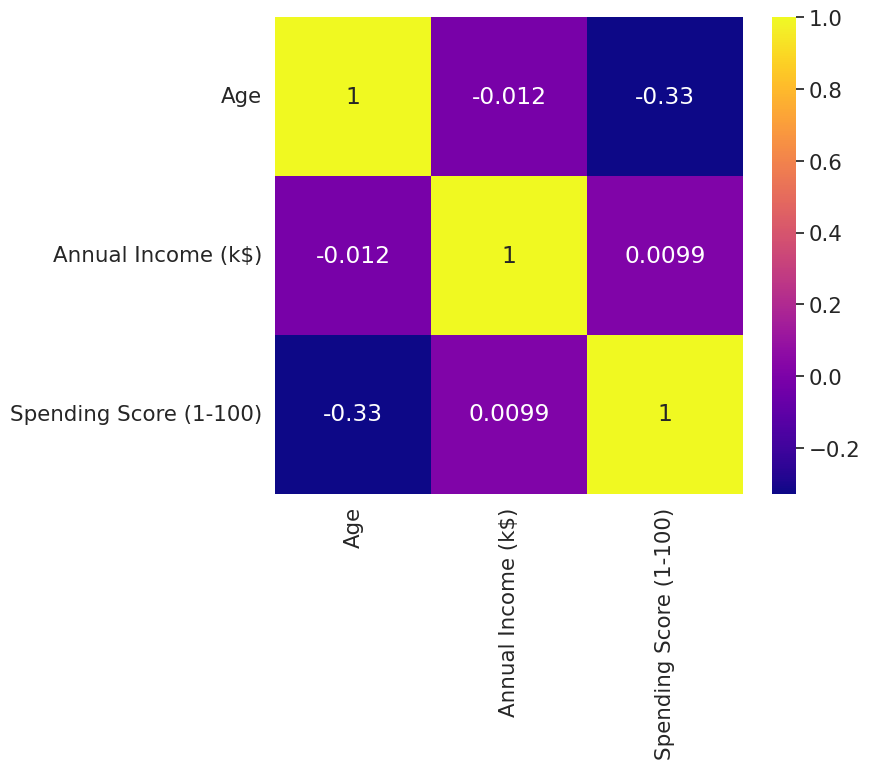

In [9]:
cor = df.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(9,8))
sns.heatmap(cor, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

**It is clear from this correlation table that older customers have less income and therefore spend less money.**

<ipython-input-10-9cb659e2b5e8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'], color='orange')
<ipython-input-10-9cb659e2b5e8>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], color='#577AFF')
<ipython-input-10-9cb659e2b5e8>:18: UserWarning: 

`distplo

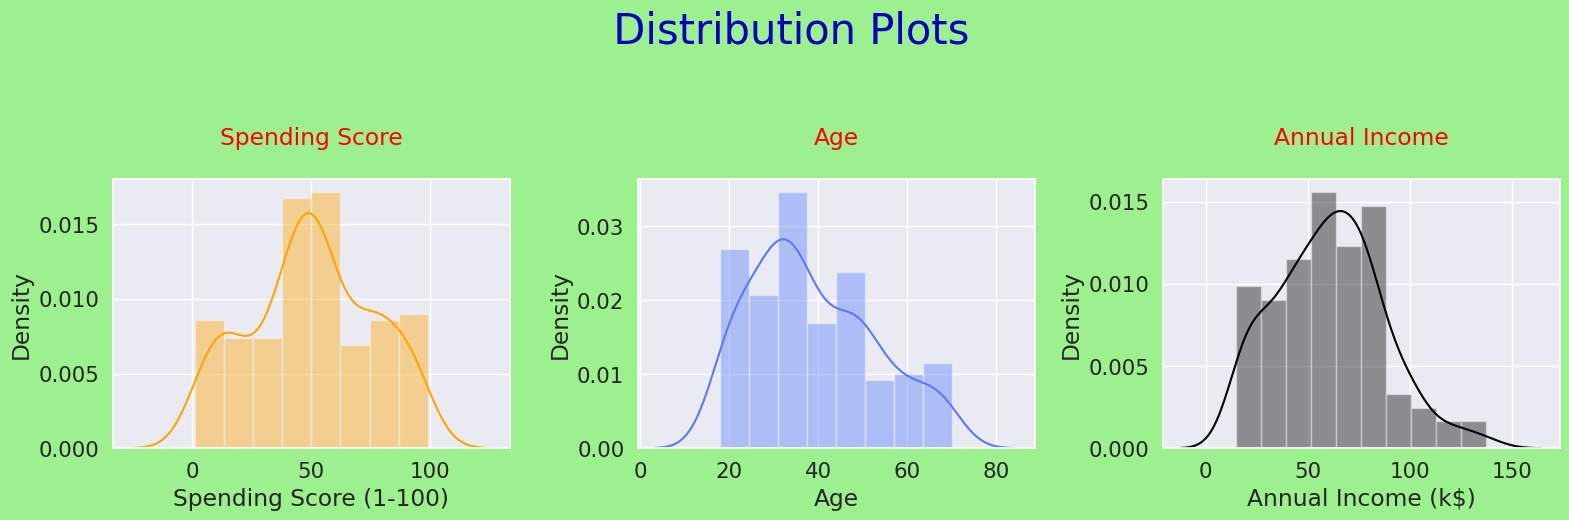

In [10]:
# -Distribution Plots-

plt.figure(figsize=(16,12),facecolor='#9DF08E')

# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score\n', color='#FF000B')
sns.distplot(df['Spending Score (1-100)'], color='orange')

# Age
plt.subplot(3,3,2)
plt.title('Age\n', color='#FF000B')
sns.distplot(df['Age'], color='#577AFF')

# Annual Income
plt.subplot(3,3,3)
plt.title('Annual Income\n', color='#FF000B')
sns.distplot(df['Annual Income (k$)'], color='black')

plt.suptitle(' Distribution Plots\n', color='#0000C1', size = 30)
plt.tight_layout()

**The distributions are generally similar to the normal distribution, with only a few standard deviations. The 'more normal' distribution among the distributions is the 'Spending Score'. That's good because it's our target column.**

In [12]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [13]:
# Before-After Label Encoder

from sklearn.preprocessing import LabelEncoder

print('\033[0;32m' + 'Before Label Encoder\n' + '\033[0m' + '\033[0;32m', df['Genre'])

le = LabelEncoder()
df['Genre'] = le.fit_transform(df.iloc[:,0])

print('\033[0;31m' + '\n\nAfter Label Encoder\n' + '\033[0m' + '\033[0;31m', df['Genre'])

Before Label Encoder
 0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object


After Label Encoder
 0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Genre, Length: 200, dtype: int64


**As you can see, we converted the 'Gender' column to numeric using the 'Label Encoder'.**

**Male --> 1 , Female -->0**

In [14]:
# Let's look at the current state of our Data Frame.
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


**All the columns have become numeric, good.**

In [16]:
# Let's calculate how much to shop for which gender

spending_score_male = 0
spending_score_female = 0

for i in range(len(df)):
    if df['Genre'][i] == 1:
        spending_score_male = spending_score_male + df['Spending Score (1-100)'][i]
    if df['Genre'][i] == 0:
        spending_score_female = spending_score_female + df['Spending Score (1-100)'][i]


print('\033[1m' + '\033[93m' + f'Males Spending Score  : {spending_score_male}')
print('\033[1m' + '\033[93m' + f'Females Spending Score: {spending_score_female}')

Males Spending Score  : 4269
Females Spending Score: 5771


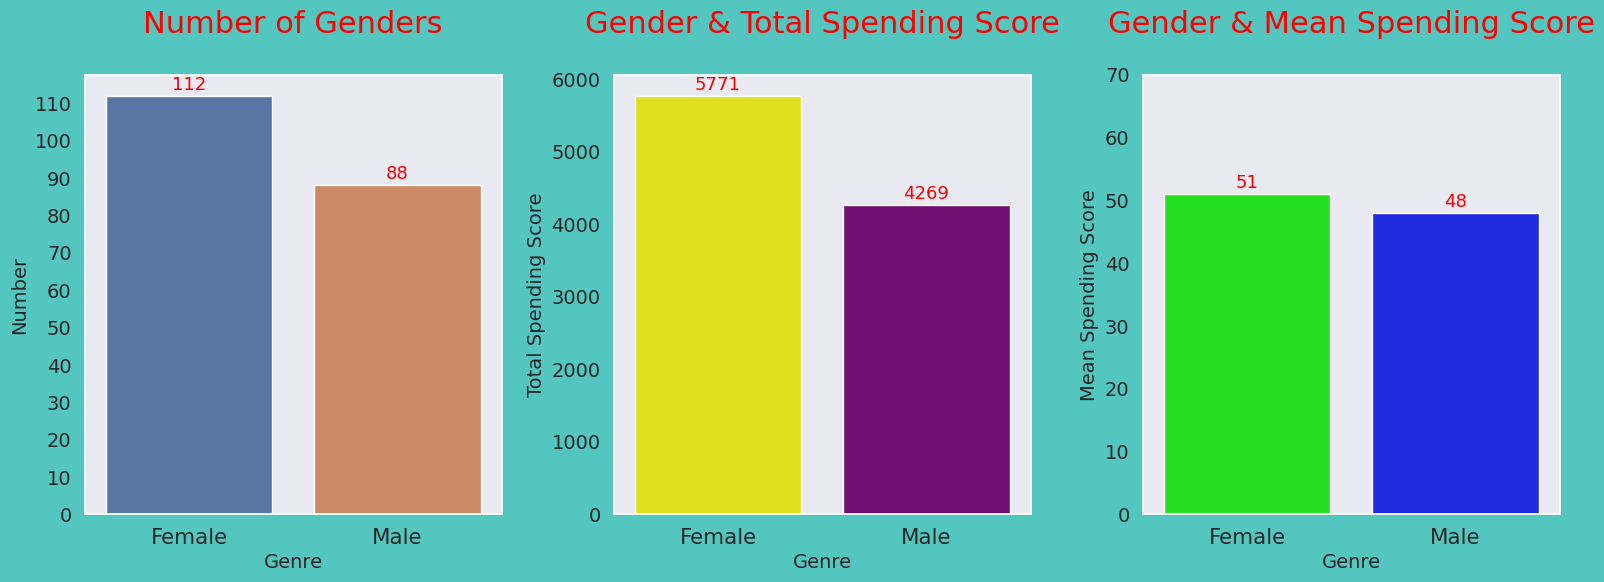

In [18]:
# Let's try to understand the relationship between gender and spending score.

# Number of genders

plt.figure(figsize=(16,16),facecolor='#54C6C0')
plt.subplot(3,3,1)
plots = sns.barplot(x=['Female','Male'], y=df['Genre'].value_counts(), data=df)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')

plt.xlabel("Genre", size=14)
plt.ylabel("Number", size=14)
plt.yticks(np.arange(0,116,10),size='14')
plt.grid(False)
plt.title("Number of Genders\n", color="red", size='22')



# Gender & Total Spending Score

list_genders_spending_score = [int(spending_score_female),int(spending_score_male)]
series_genders_spending_score = pd.Series(data = list_genders_spending_score)


plt.subplot(3,3,2)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score, palette=['yellow','purple'])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')

plt.xlabel("Genre", size=14)
plt.ylabel("Total Spending Score", size=14)
plt.yticks(np.arange(0,6001,1000),size='14')
plt.grid(False)
plt.title("Gender & Total Spending Score\n", color="red", size='22')



# Gender & Mean Spending Score

list_genders_spending_score_mean = [int(spending_score_female/df['Genre'].value_counts()[0]),int(spending_score_male/df['Genre'].value_counts()[1])]
series_genders_spending_score_mean = pd.Series(data = list_genders_spending_score_mean)

plt.subplot(3,3,3)
plots = sns.barplot(x=['Female','Male'], y=series_genders_spending_score_mean, palette='hsv')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points',color='red')

plt.xlabel("Genre", size=14)
plt.ylabel("Mean Spending Score", size=14)
plt.yticks(np.arange(0,71,10),size='14')
plt.grid(False)
plt.title("Gender & Mean Spending Score\n", color="red", size='22')
plt.tight_layout()
plt.show()

**What do we understand from these 3 graphs?**

**There is no significant difference in the mean spending scores of males and females. Since the mean spending scores are very close to each other, the difference between the total spending scores is the difference between the number of male and female customers, but this difference is not serious. Considering all this, it would be meaningless to choose a gender-based target audience. ✓**

Text(0.5, 1.0, 'Age - Spending Score')

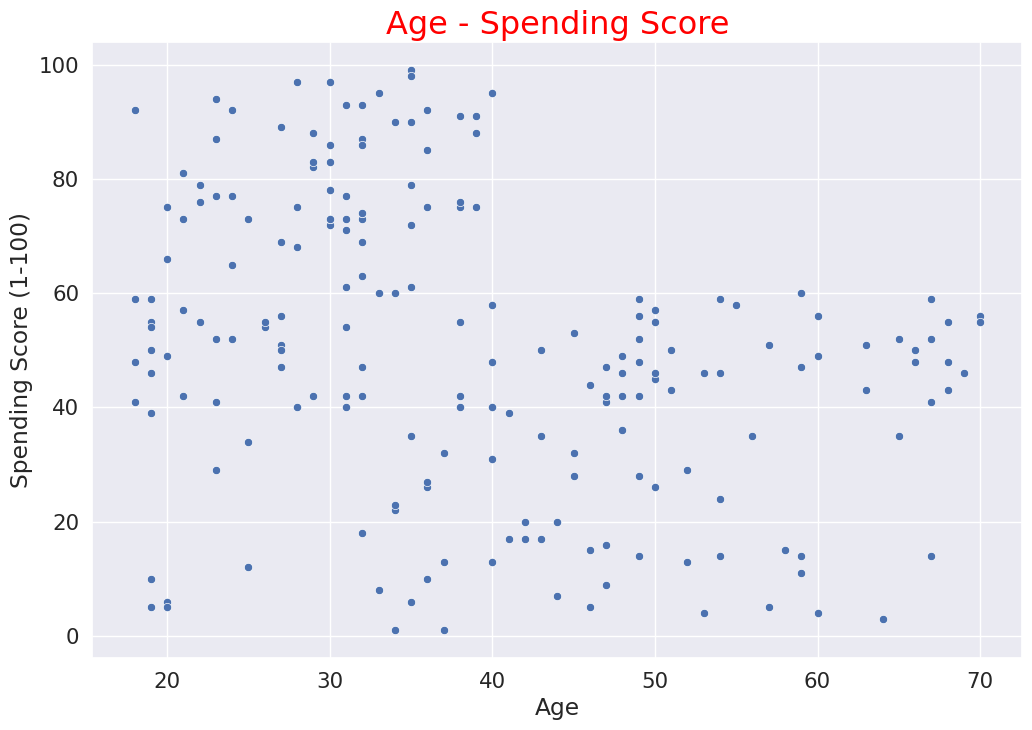

In [19]:
# Let's look at the relationship between Age and Spending score

plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Age'], y = df['Spending Score (1-100)'])
plt.title('Age - Spending Score', size = 23, color='red')

**People between the ages of 20-40 have made more purchases, considering the inference we just made about women, we can make our target audience more specific.**

<ipython-input-20-739382f27f4a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], palette = "red")


Text(0.5, 1.0, 'Annual Income - Spending Score')

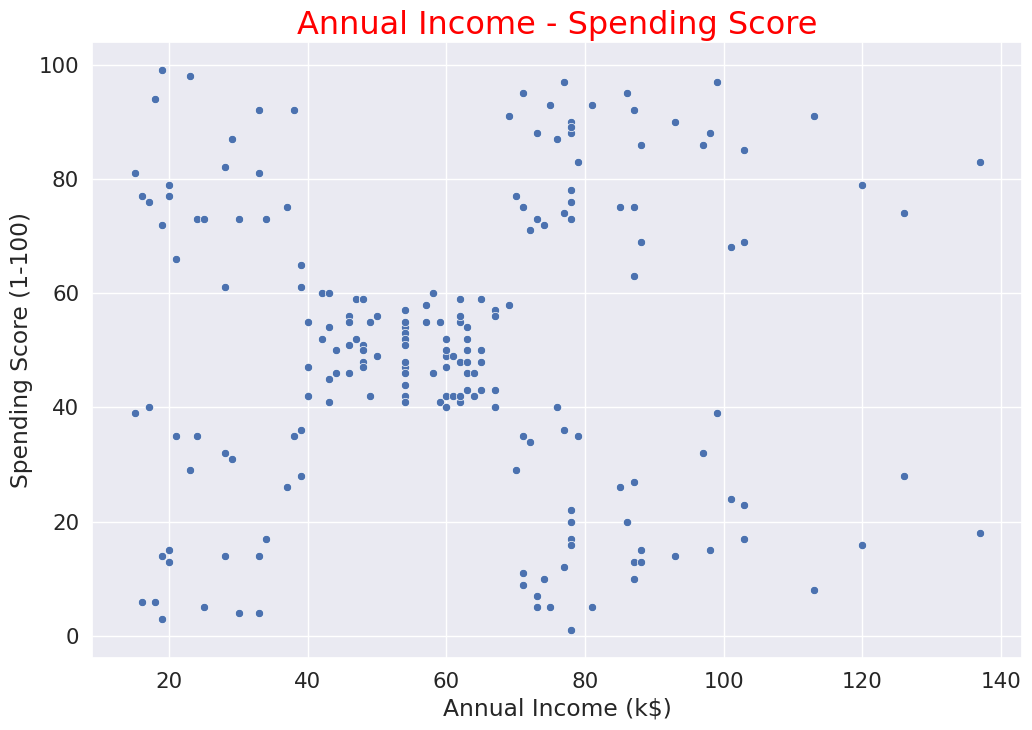

In [20]:
# Let's look at the relationship between Annual Income and Spending Score

plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], palette = "red")
plt.title('Annual Income - Spending Score', size = 23, color='red')

**One of the two regions shown can be selected as the target audience. Even though the number of people whose annual income is between (40-60)k$ is higher (we understand this from the number of data points), the number of that audience is higher but the spending score is low, so if we make shopping attractive for them by choosing the target audience from the two regions above, we will see more profit can be made.**


<a id = "3"></a><br> <p style = "font-size : 45px; color :#190033 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #66FFB2; border-radius: 5px 5px;"><strong>CLUSTERINGS</strong></p>

<a id = "4"></a><br> <p style = "font-size : 30px; color :#0009B7 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #F7CF2D; border-radius: 5px 5px;">Clustering (4 Variables)</p>

# PCA
**Why PCA?**
<a id = "5"></a><br>
**Since we will be doing clustering with 4 variables, I will reduce the size, because after the clustering, I may have trouble in 4D visualization while visualizing. I will do the dimension reduction with PCA, PCA works like this: for example we have a dataset with 4 columns, we want to make it as many columns as we want, I will reduce it to 2 columns.**

In [21]:
# x assignment
x = df.iloc[:,0:].values
print("\033[1;31m"  + f'X data before PCA:\n {x[0:5]}')


# standardization before PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)


# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_2D = pca.fit_transform(X)
print("\033[0;32m" + f'\nX data after PCA:\n {X_2D[0:5,:]}')

X data before PCA:
 [[ 1 19 15 39]
 [ 1 21 15 81]
 [ 0 20 16  6]
 [ 0 23 16 77]
 [ 0 31 17 40]]

X data after PCA:
 [[-0.40638272 -0.52071363]
 [-1.42767287 -0.3673102 ]
 [ 0.05076057 -1.89406774]
 [-1.6945131  -1.63190805]
 [-0.31310838 -1.81048272]]


**As you can see, X data, which we defined as 4 dimensional (red part), has now been reduced to 2 dimensions (green part) thanks to PCA.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

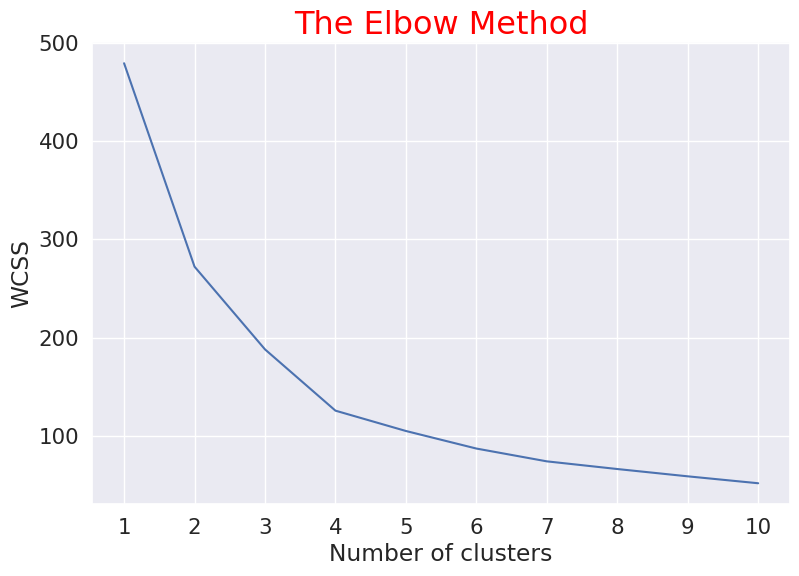

In [22]:
# finding optimum number of clusters
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(X_2D)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

**'4' is optimum number of clusters. Because the most break in the chart is at that point. This is how we will select the next optimal n_clusters.**

In [23]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X_2D)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


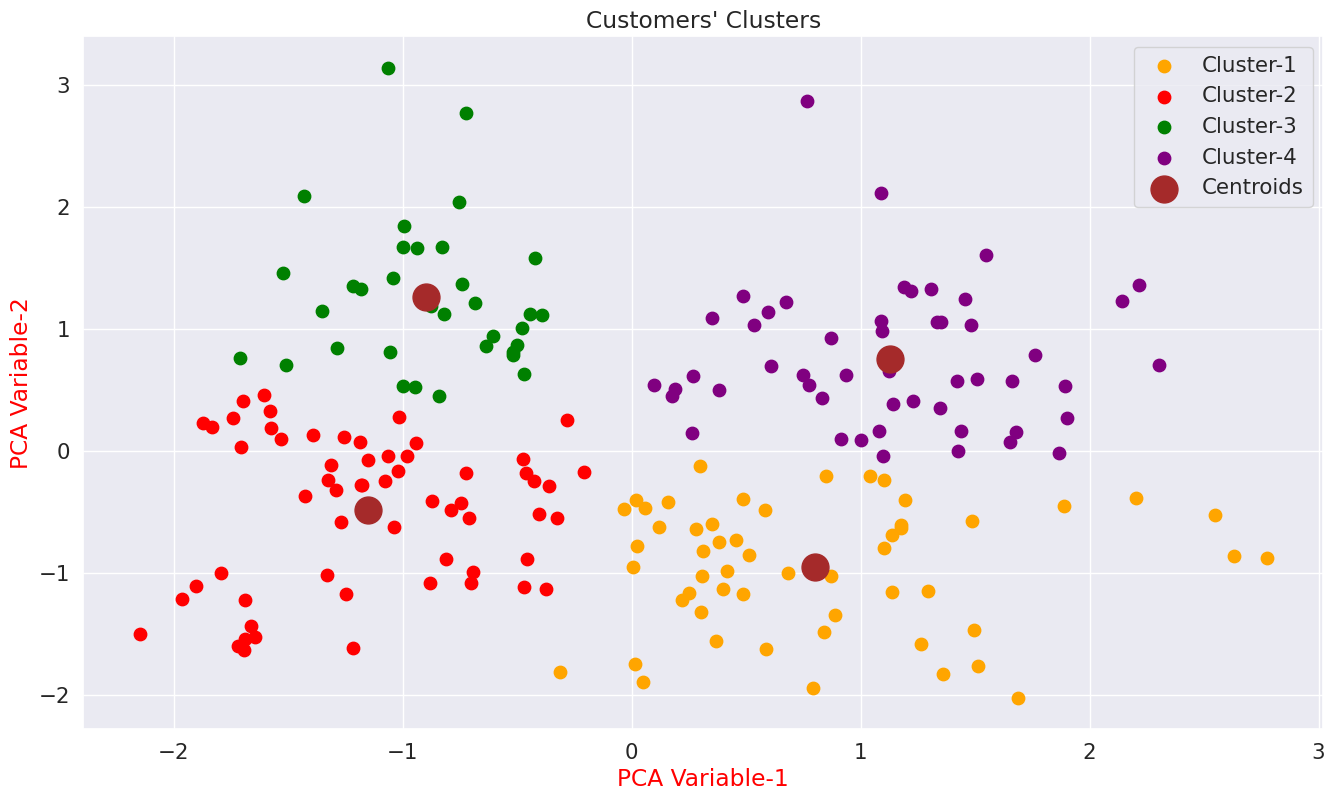

In [24]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(X_2D[y_kmeans == 0, 0], X_2D[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(X_2D[y_kmeans == 1, 0], X_2D[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(X_2D[y_kmeans == 2, 0], X_2D[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster-3')
plt.scatter(X_2D[y_kmeans == 3, 0], X_2D[y_kmeans == 3, 1], s = 80, c = 'purple', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA Variable-1', color='red')
plt.ylabel('PCA Variable-2', color='red')
plt.legend()
plt.show()

<a id = "6"></a><br> <p style = "font-size : 30px; color :#0009B7 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #F7CF2D; border-radius: 5px 5px;">Clustering (Age & Annual Income & Spending Score)

In [25]:
# x assignment
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values
x_df = df[['Age','Annual Income (k$)','Spending Score (1-100)']] # this line for 3d scatter plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

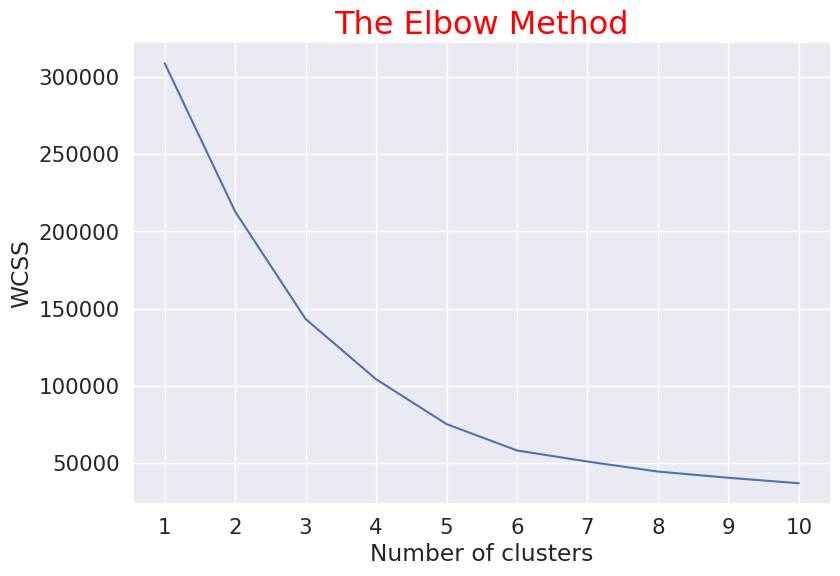

In [26]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

**'6' is optimum number of clusters**

In [27]:
# KMeans
kmeans = KMeans(n_clusters = 6, init ='k-means++', random_state=88)
clusters = kmeans.fit_predict(x_df)
x_df['label'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# # clusters visualization
fig = px.scatter_3d(data_frame=x_df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color = 'label', size = 'label')
fig.show()

**3D visualization was used as there were 3 variables.**

<a id = "7"></a><br> <p style = "font-size : 30px; color :#0009B7 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #F7CF2D; border-radius: 5px 5px;">Clustering (Age & Annual Income)</p>

In [29]:
# x assignment
x = df[['Age','Annual Income (k$)']].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

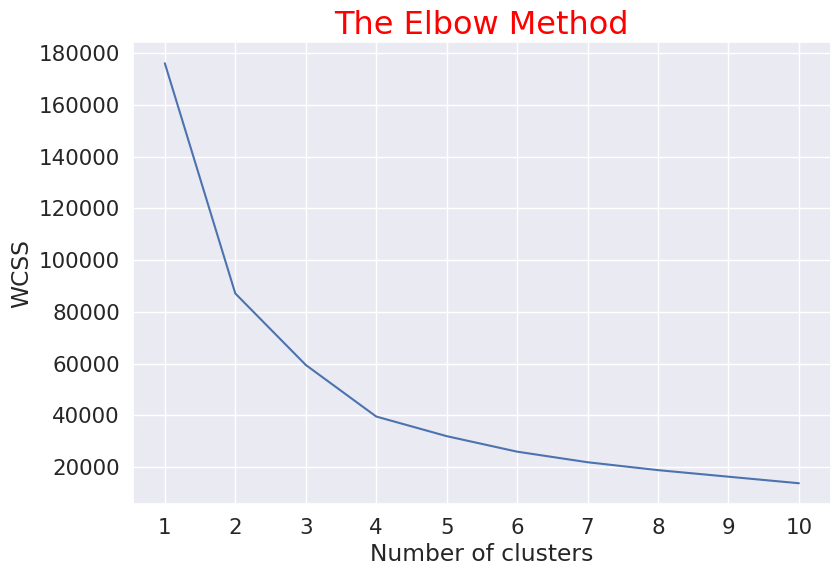

In [30]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

**'2' is optimum number of clusters.**

In [31]:
# KMeans
kmeans = KMeans(n_clusters = 2, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



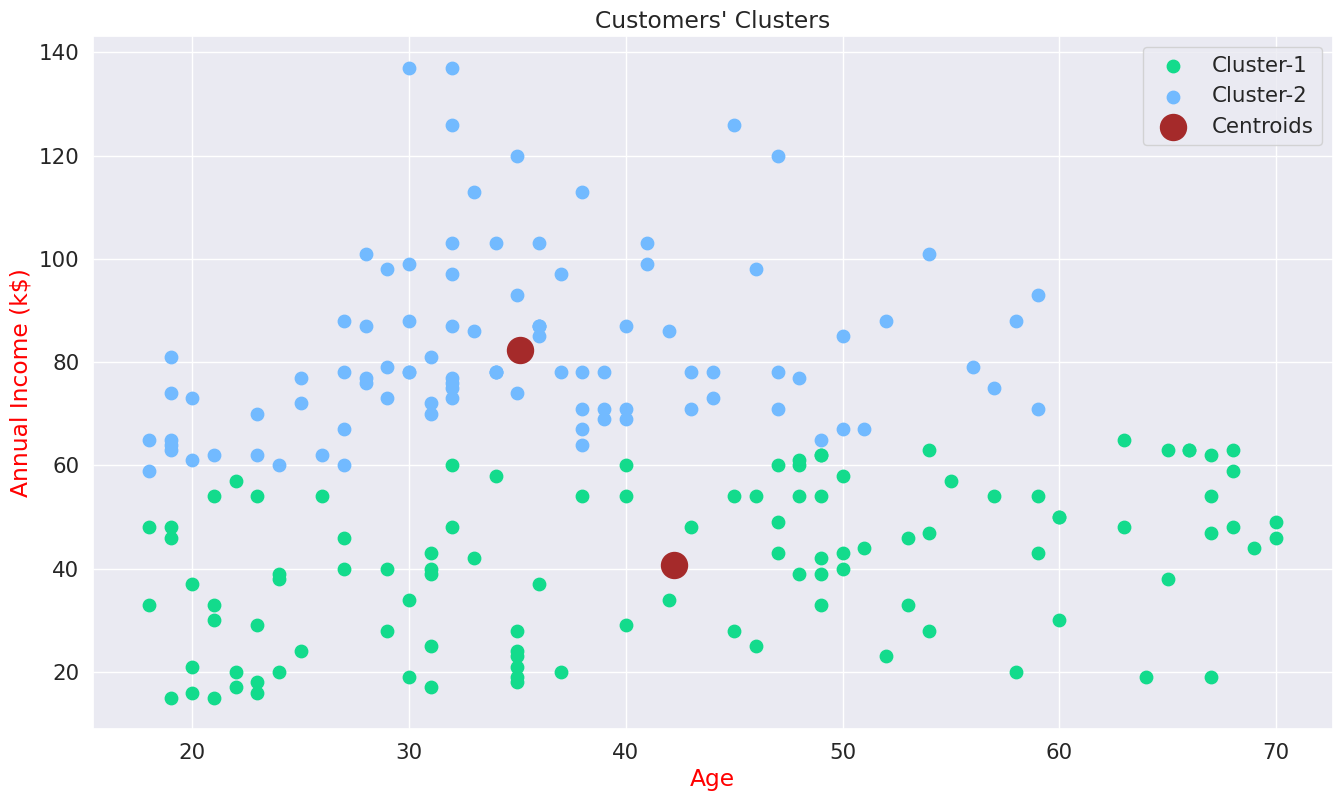

In [32]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = '#13DB8C', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = '#72BAFF', label = 'Cluster-2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 350, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Annual Income (k$)', color='red')
plt.legend()
plt.show()

<a id = "8"></a><br> <p style = "font-size : 30px; color :#0009B7 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #F7CF2D; border-radius: 5px 5px;">Clustering (Annual Income & Spending Score)</p>

In [33]:
# x assignment
x = df[['Annual Income (k$)','Spending Score (1-100)']].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

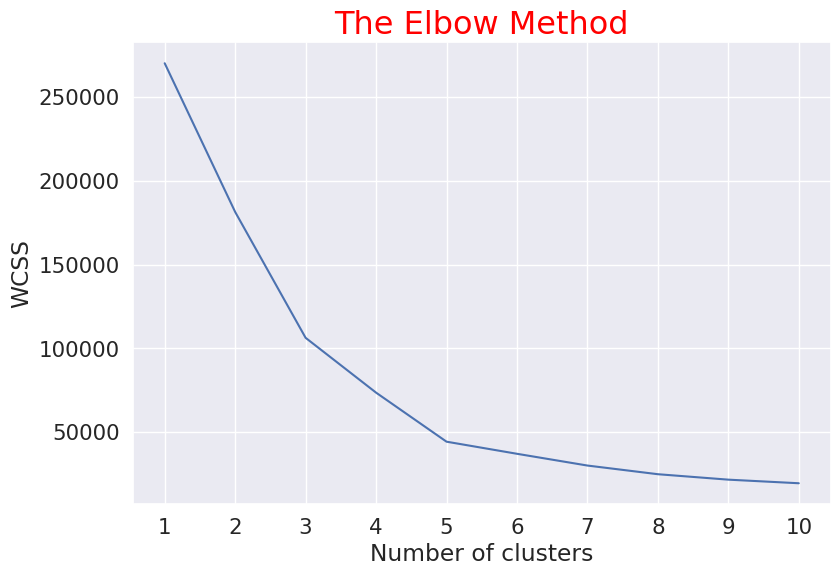

In [34]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

**'5' is optimum number of clusters.**

In [35]:
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



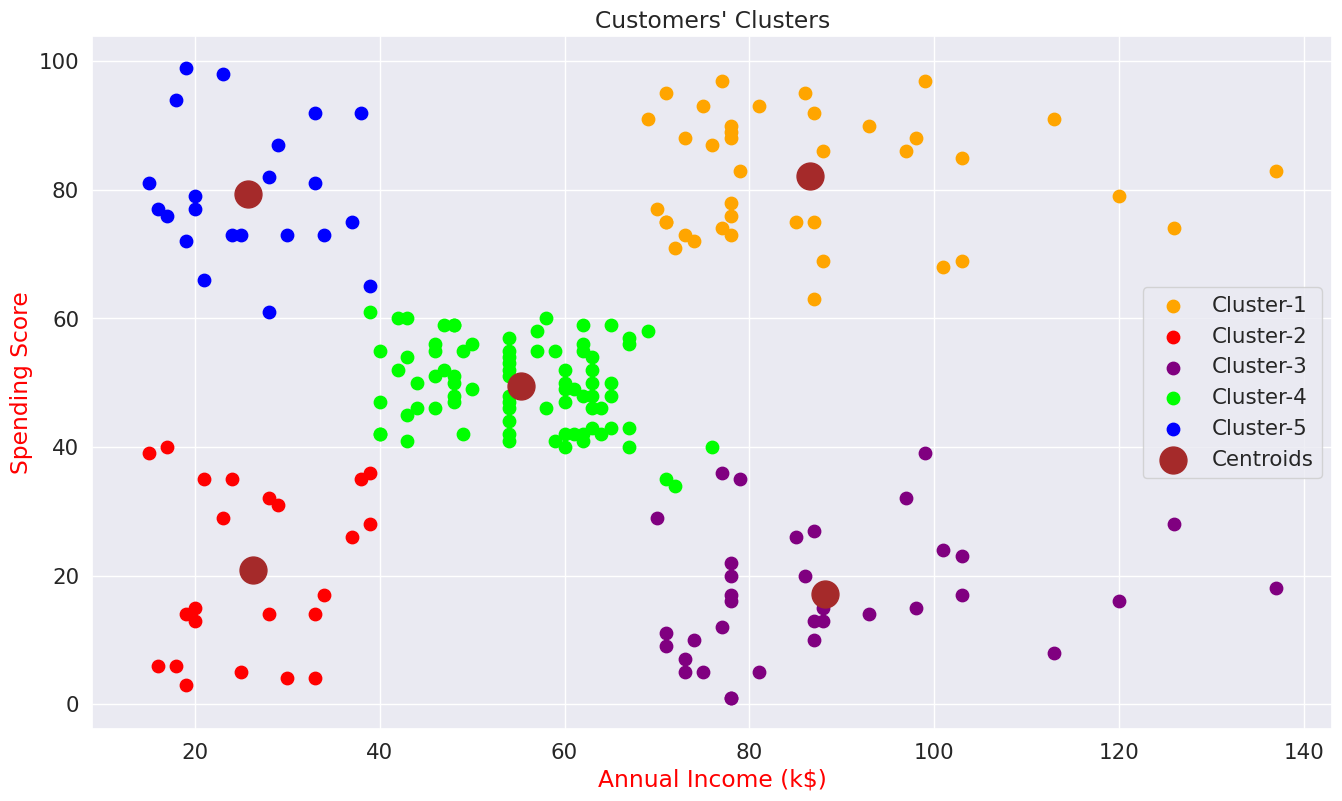

In [36]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = 'purple', label = 'Cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 80, c = 'lime', label = 'Cluster-4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 80, c = 'blue', label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Annual Income (k$)', color='red')
plt.ylabel('Spending Score', color='red')
plt.legend()
plt.show()

<a id = "9"></a><br> <p style = "font-size : 30px; color :#0009B7 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #F7CF2D; border-radius: 5px 5px;">Clustering (Age & Spending Score)</p>

In [37]:
# x assignment
x = df[['Age','Spending Score (1-100)']].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

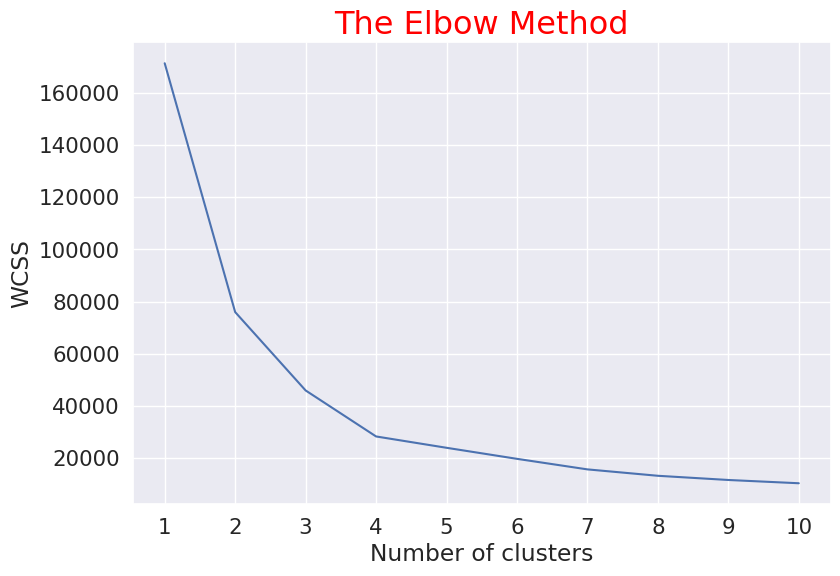

In [38]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(x)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

**'4' is optimum number of clusters.**

In [39]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



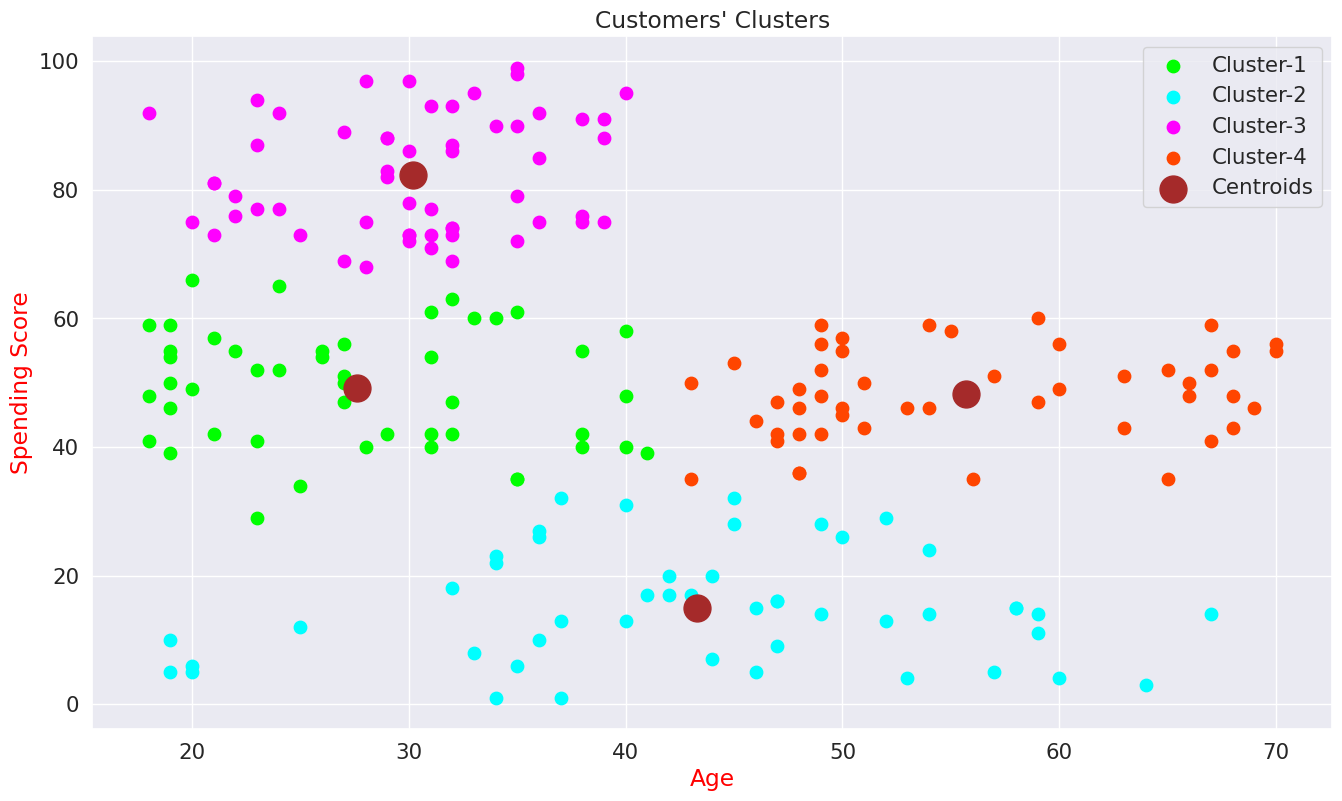

In [40]:
# clusters visualization
plt.figure(1 , figsize = (16 ,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = '#00FF00', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = '#00FFFF', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = '#FF00FF', label = 'Cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 80, c = '#FF4500', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age', color='red')
plt.ylabel('Spending Score', color='red')
plt.legend()
plt.show()

<a id = "10"></a><br> <p style = "font-size : 30px; color :#0009B7 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #F7CF2D; border-radius: 5px 5px;">Conclusion</p>

* It seems very clear that there is no big difference between male and female customers, so a gender-based audience should not be chosen.
* In addition, it seems that the audience between the ages of 20-40 spend more in this store compared to people in other age groups, making special campaigns for the audience between the ages of 20-40 can increase the profit of the supermarket.
*  This is not the optimal strategy, but it could be an alternative. Since the average spending scores of middle-income (40k-70k dollars) customers in this store are also at a medium level, it is difficult to increase their spending to higher levels because their income is not conducive to this, but by making campaigns to increase the number of these customers, the store can increase its profit by acquiring more middle-income customers.
* I think the best strategy would be to target high-income customers. The reason is that some of the high-income customers spend high, while a significant portion of these customers spend low, there may be some things that low-spenders are not satisfied. Improvements to be made in service and quality can increase the spending of high-income customers who come to the store, but do not.
* The distribution of the data was generally good, but the standard deviations were a little high
* There was no significant positive correlation between the data, only a negative correlation between age and spending score that could be important, showing us that older people who choose this supermarket spend less money than people in other age groups.
